In [2]:
# Common imports
import numpy as np
import os
import seaborn as sns
from sklearn.preprocessing import Imputer

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12


import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
import plotly.offline as py
py.init_notebook_mode(connected=True)
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.offline as offline
offline.init_notebook_mode()
import plotly.tools as tls
import squarify
from numpy import array
from matplotlib import cm

import datetime

# to make this notebook's output stable across runs
np.random.seed(42)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = ""
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

Reusing code from:

https://www.kaggle.com/codename007/home-credit-complete-eda-feature-importance

https://www.kaggle.com/willkoehrsen/start-here-a-gentle-introduction
    
https://www.kaggle.com/shivamb/homecreditrisk-extensive-eda-baseline-0-772

Read all datasets:

In [3]:
import pandas as pd
train_data = pd.read_csv("./data/application_train.csv")
test_data = pd.read_csv("./data/application_test.csv")
POS_CASH_balance = pd.read_csv('./data/POS_CASH_balance.csv')
bureau_balance = pd.read_csv('./data/bureau_balance.csv')
previous_application = pd.read_csv('./data/previous_application.csv')
installments_payments = pd.read_csv('./data/installments_payments.csv')
credit_card_balance = pd.read_csv('./data/credit_card_balance.csv')
bureau = pd.read_csv('./data/bureau.csv')

In [4]:
train_data.head(5)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

              ...              FLAG_DOCUMENT_18 FLAG_DOCUMENT_19  \
0             ...                             0                0   
1             ...                             0                0   
2             ...                             0                0   
3             ...                             0                0   
4             ...                             0                0   

  FLAG_DOCUMENT_20 FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR  \
0                0                0                        0.0   
1                0                0                        0.0   
2                0                0                        0.0   
3                0                0                        NaN   
4                0                0                        0.0   

  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
0                       0.0                         0.0   
1                       0.0                         0.0   
2                       0.0                         0.0   
3                       NaN                         NaN   
4                       0.0                         0.0   

   AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        NaN                        NaN   
4                        0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_YEAR  
0                         1.0  
1                         0.0  
2                         0.0  
3                         NaN  
4                         0.0  

[5 rows x 122 columns]

## First glimpse

In [5]:
print("Size of training data : ",train_data.shape)
print("Size of test data : ",test_data.shape)
print('Size of POS_CASH_balance data', POS_CASH_balance.shape)
print('Size of bureau_balance data', bureau_balance.shape)
print('Size of previous_application data', previous_application.shape)
print('Size of installments_payments data', installments_payments.shape)
print('Size of credit_card_balance data', credit_card_balance.shape)
print('Size of bureau data', bureau.shape)

('Size of training data : ', (307511, 122))
('Size of test data : ', (48744, 121))
('Size of POS_CASH_balance data', (10001358, 8))
('Size of bureau_balance data', (27299925, 3))
('Size of previous_application data', (1670214, 37))
('Size of installments_payments data', (13605401, 8))
('Size of credit_card_balance data', (3840312, 23))
('Size of bureau data', (1716428, 17))


In [6]:
list(train_data.columns)

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_A

In [7]:
train_data.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

                  ...              FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  \
count             ...                 307511.000000     307511.000000   
mean              ...                      0.008130          0.000595   
std               ...                      0.089798          0.024387   
min               ...                      0.000000          0.000000   
25%               ...                      0.000000          0.000000   
50%               ...                      0.000000          0.000000   
75%               ...                      0.000000          0.000000   
max               ...                      1.000000          1.000000   

       FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  AMT_REQ_CREDIT_BUREAU_HOUR  \
count     307511.000000     307511.000000               265992.000000   
mean           0.000507          0.000335                    0.006402   
std            0.022518          0.018299                    0.083849   
min            0.000000          0.000000                    0.000000   
25%            0.000000          0.000000                    0.000000   
50%            0.000000          0.000000                    0.000000   
75%            0.000000          0.000000                    0.000000   
max            1.000000          1.000000                    4.000000   

       AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
count              265992.000000               265992.000000   
mean                    0.007000                    0.034362   
std                     0.110757                    0.204685   
min                     0.000000                    0.000000   
25%                     0.000000                    0.000000   
50%                     0.000000                    0.000000   
75%                     0.000000                    0.000000   
max                     9.000000                    8.000000   

       AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
count              265992.000000              265992.000000   
mean                    0.267395                   0.265474   
std                     0.916002                   0.794056   
min                     0.000000                   0.000000   
25%                     0.000000                   0.

## 2. Main training dataset

### 2.1 TARGET

In [13]:
temp = train_data['TARGET'].value_counts()
labels = temp.index
sizes = (temp / temp.sum())*100
trace = go.Pie(labels=labels, values=sizes, hoverinfo='label+percent')
layout = go.Layout(title='Target')
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)


This is an unbalanced problem.

### 2.2 Missing values and type of data

In [14]:
# checking missing data in training data 
total = train_data.isnull().sum().sort_values(ascending = False)
percent = (train_data.isnull().sum()/train_data.isnull().count()*100).sort_values(ascending = False)
missing_train_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_train_data.head(10)

('Number of columns with missing data : ', 67)


Total    Percent
COMMONAREA_MEDI           214865  69.872297
COMMONAREA_AVG            214865  69.872297
COMMONAREA_MODE           214865  69.872297
NONLIVINGAPARTMENTS_MODE  213514  69.432963
NONLIVINGAPARTMENTS_MEDI  213514  69.432963
NONLIVINGAPARTMENTS_AVG   213514  69.432963
FONDKAPREMONT_MODE        210295  68.386172
LIVINGAPARTMENTS_MEDI     210199  68.354953
LIVINGAPARTMENTS_MODE     210199  68.354953
LIVINGAPARTMENTS_AVG      210199  68.354953

('Number of columns with missing data : ', 67)
('Saving figure', '0-missing_data')


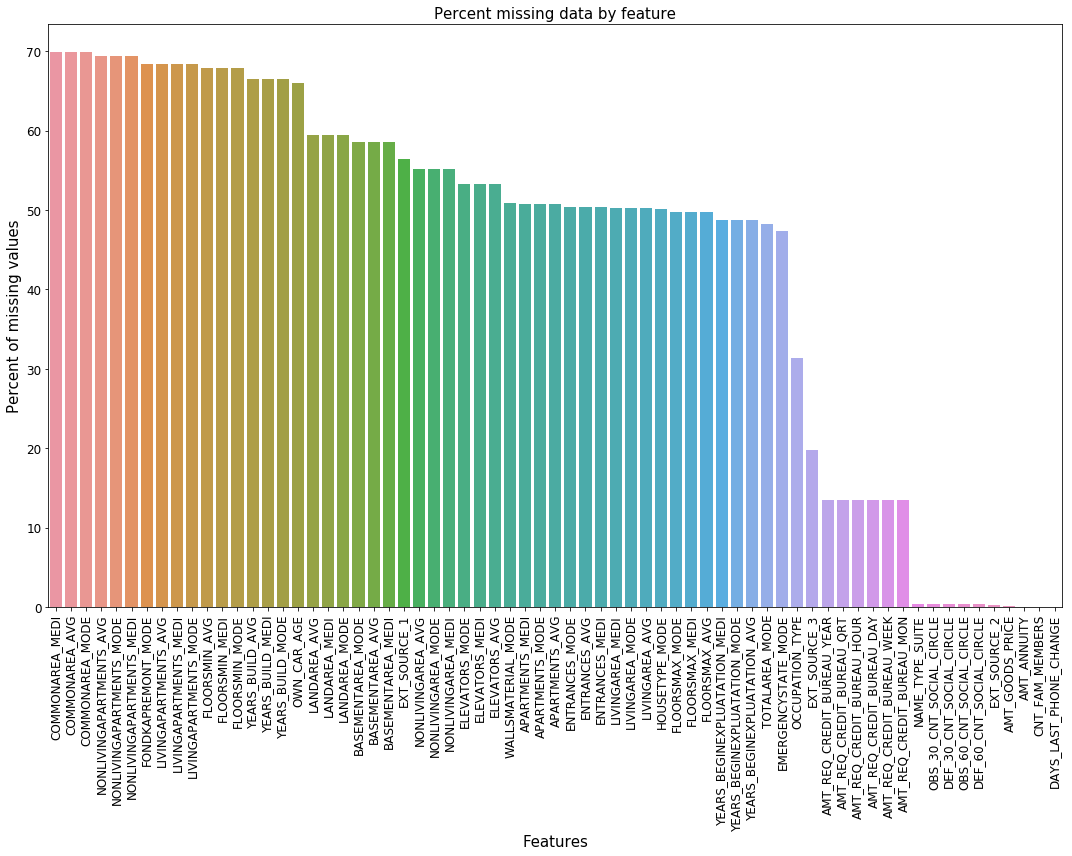

In [9]:
print("Number of columns with missing data : ",(train_data.isnull().sum()>0).sum())

data_na = (train_data.isnull().sum() / len(train_data)) * 100
data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)[:67]
missing_data = pd.DataFrame({'Missing Ratio' :data_na})
missing_data.head(20)

f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=data_na.index, y=data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
save_fig("0-missing_data")

In [10]:
# Number of each type of column
train_data.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

### 2.3 Correlation matrix

('Saving figure', '0-corr_matrix')


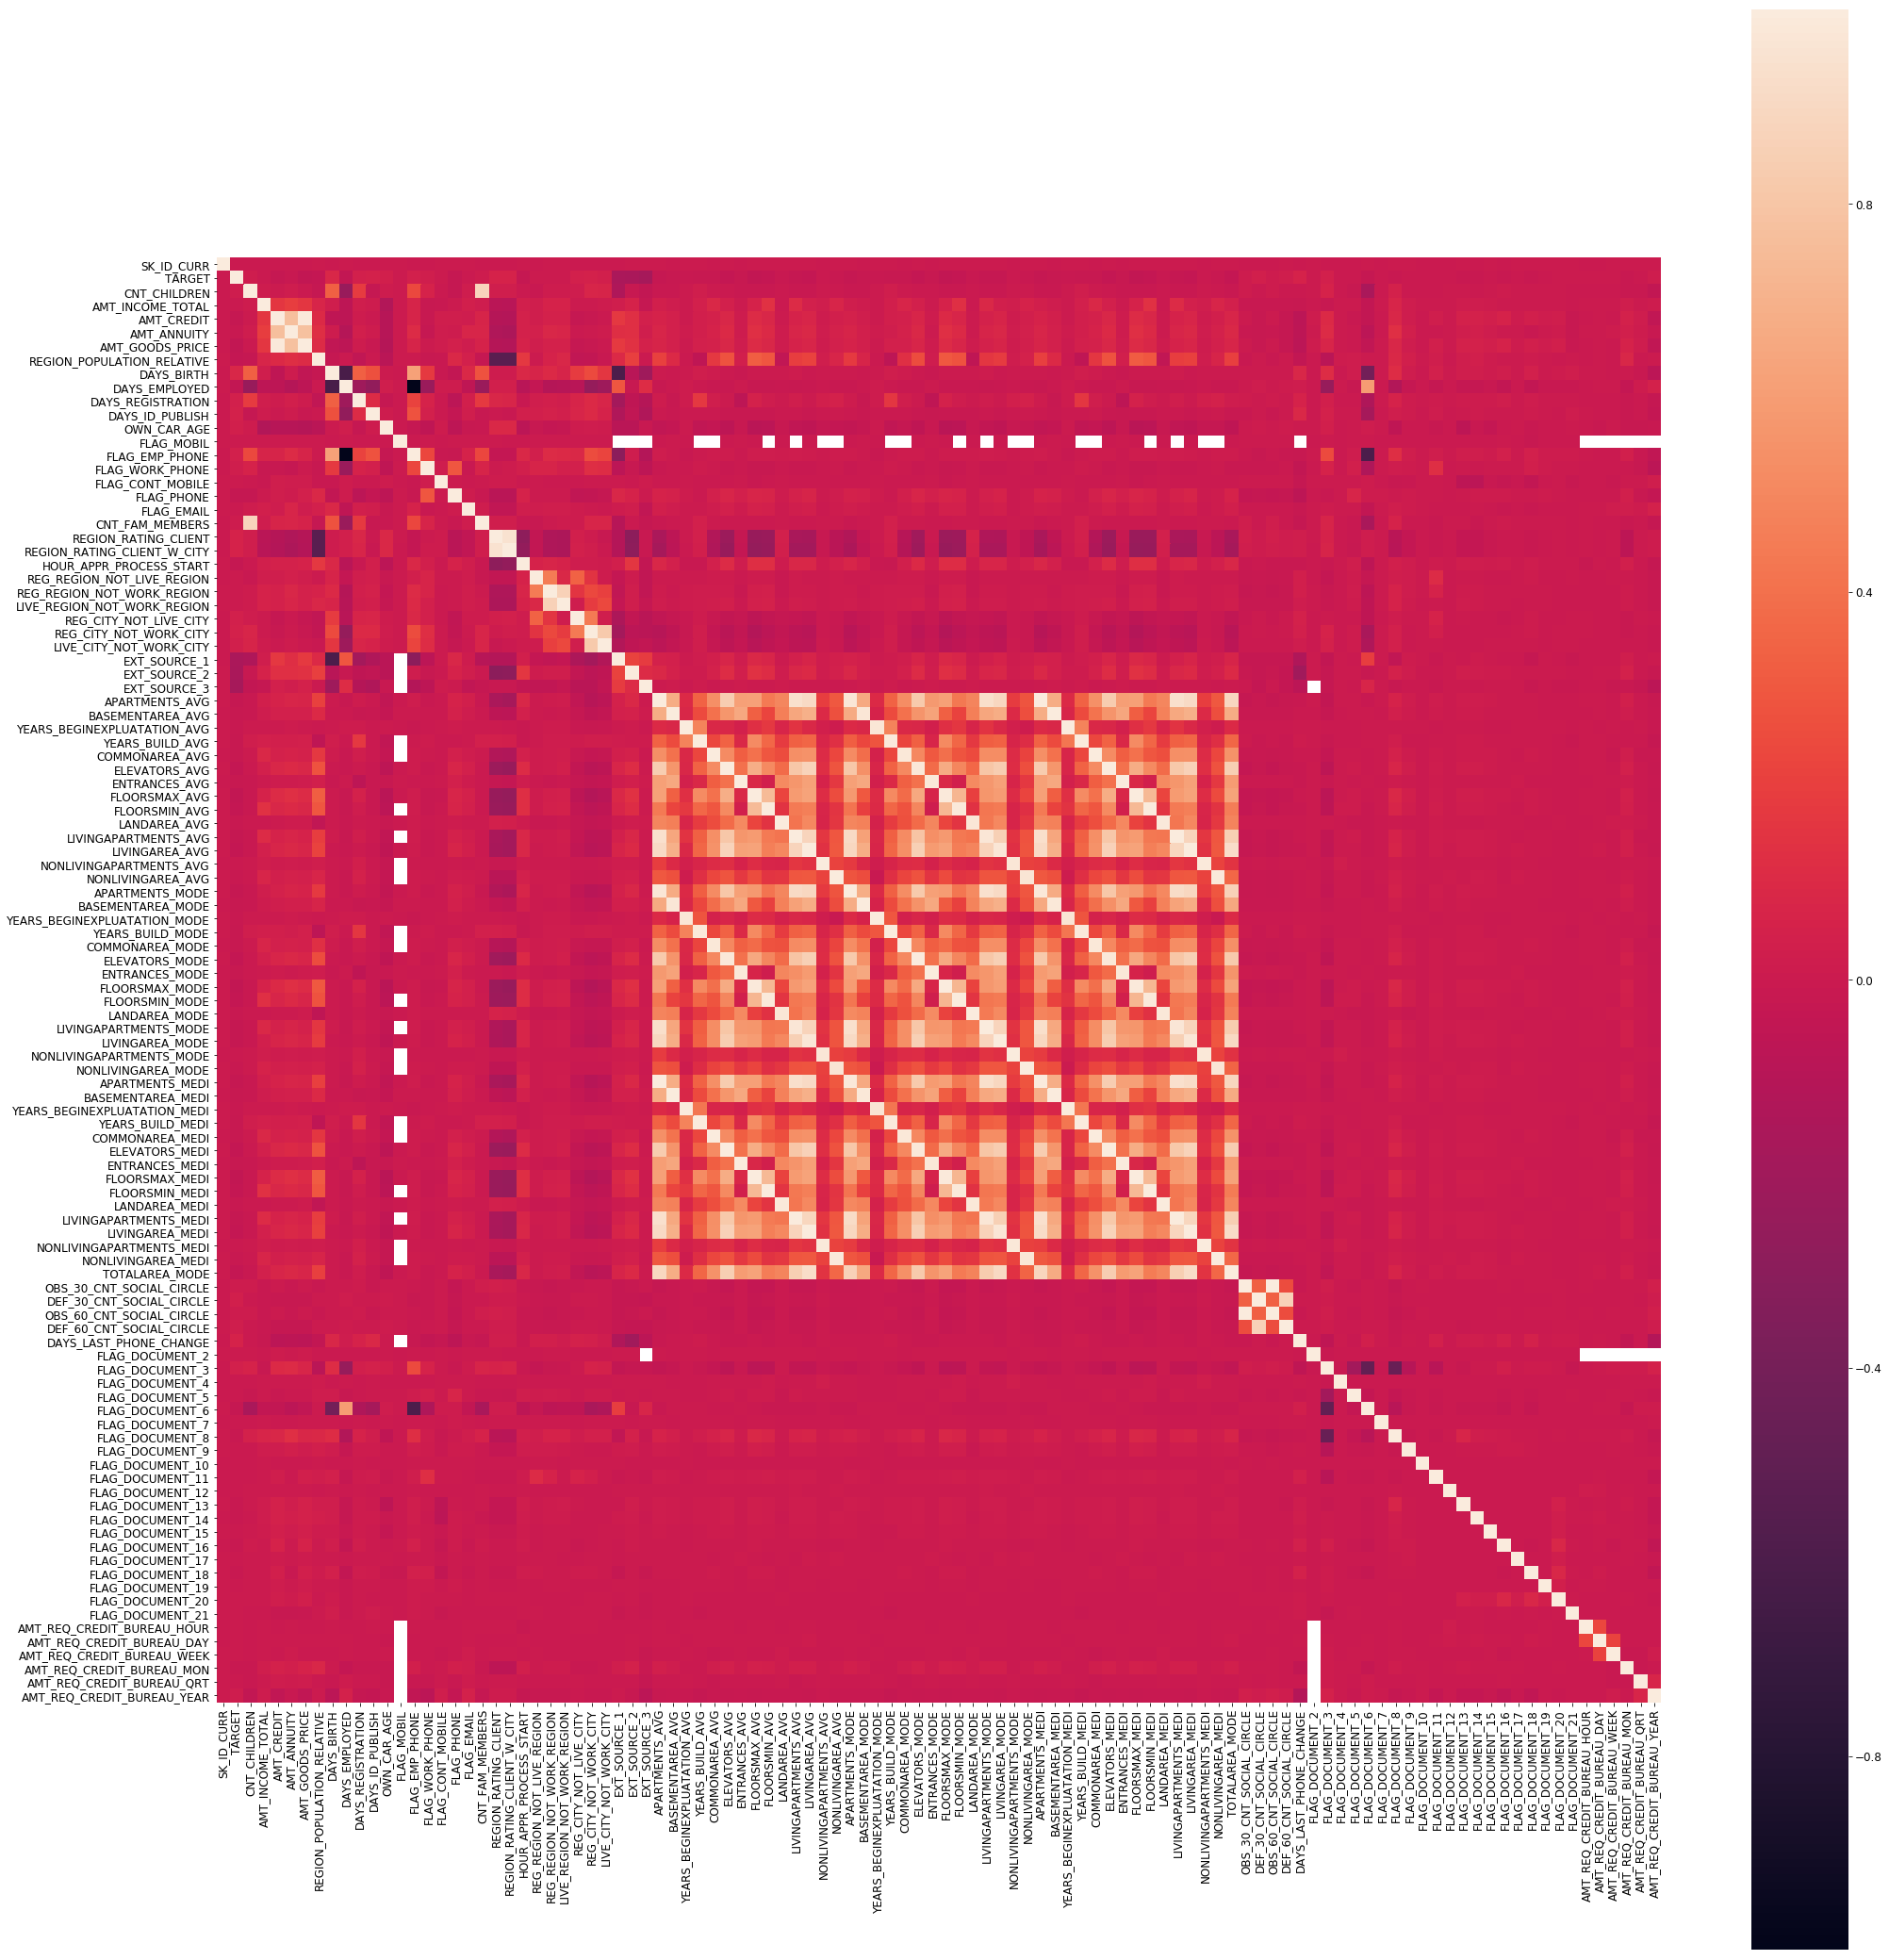

In [22]:
corr_matrix = train_data.corr()
plt.subplots(figsize=(30,30))
sns.heatmap(corr_matrix, square=True, fmt=".2f")
save_fig("0-corr_matrix")

In [40]:
list(train_data.select_dtypes('float').columns)

['AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_REGISTRATION',
 'OWN_CAR_AGE',
 'CNT_FAM_MEMBERS',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_M

### 2.4 Credit amount of the loan (AMT_CREDIT)

('Saving figure', '0-AMT_CREDIT')


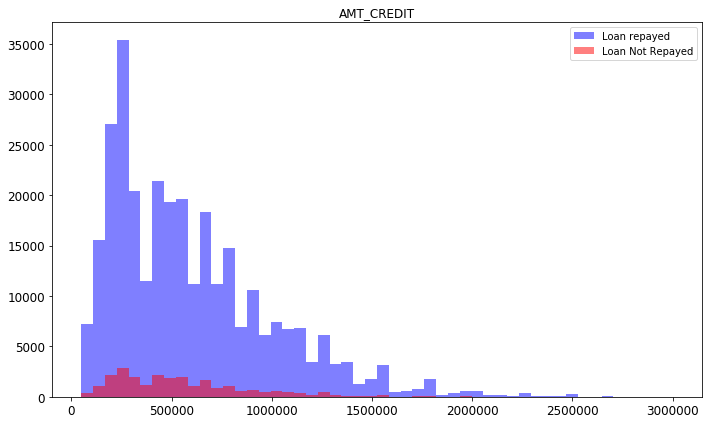

In [34]:
plt.figure(figsize=(10, 6))
plt.hist(train_data.AMT_CREDIT,bins=50,range=[50000,3000000],alpha=0.5, label='Loan repayed',color='b')
plt.hist(train_data[train_data.TARGET==1].AMT_CREDIT,bins=50,range=[50000,3000000],alpha=0.5, label='Loan Not Repayed',color='r')
plt.title("AMT_CREDIT")
plt.legend()

save_fig("0-AMT_CREDIT")

### 2.5 Income of the client (AMT_INCOME_TOTAL)

('Saving figure', '0-AMT_INCOME_TOTAL')


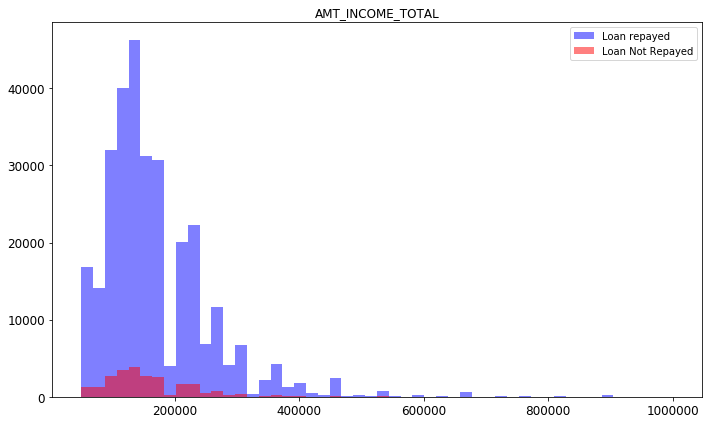

In [37]:
plt.figure(figsize=(10, 6))
plt.hist(train_data.AMT_INCOME_TOTAL,bins=50,range=[50000,1000000],alpha=0.5, label='Loan repayed',color='b')
plt.hist(train_data[train_data.TARGET==1].AMT_INCOME_TOTAL,bins=50,range=[50000,1000000],alpha=0.5, label='Loan Not Repayed',color='r')
plt.title("AMT_INCOME_TOTAL")
plt.legend()

save_fig("0-AMT_INCOME_TOTAL")

### 2.6 Loan annuity (AMT_ANNUITY) 

('Saving figure', '0-AMT_ANNUITY')


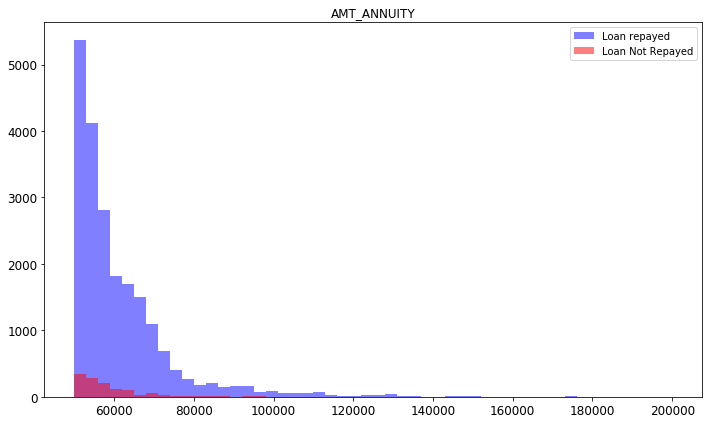

In [42]:
plt.figure(figsize=(10, 6))
plt.hist(train_data.AMT_ANNUITY,bins=50,range=[50000,200000],alpha=0.5, label='Loan repayed',color='b')
plt.hist(train_data[train_data.TARGET==1].AMT_ANNUITY,bins=50,range=[50000,200000],alpha=0.5, label='Loan Not Repayed',color='r')
plt.title("AMT_ANNUITY")
plt.legend()

save_fig("0-AMT_ANNUITY")

### 2.7 Loan goods price (AMT_GOODS_PRICE) 

('Saving figure', '0-AMT_GOODS_PRICE')


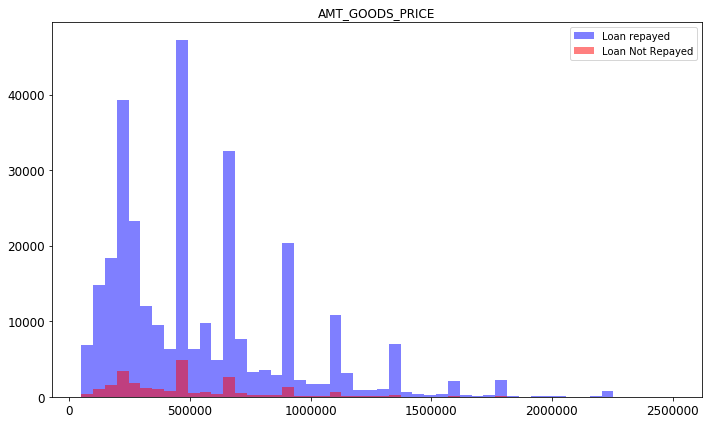

In [44]:
plt.figure(figsize=(10, 6))
plt.hist(train_data.AMT_GOODS_PRICE,bins=50,range=[50000,2500000],alpha=0.5, label='Loan repayed',color='b')
plt.hist(train_data[train_data.TARGET==1].AMT_GOODS_PRICE,bins=50,range=[50000,2500000],alpha=0.5, label='Loan Not Repayed',color='r')
plt.title("AMT_GOODS_PRICE")
plt.legend()

save_fig("0-AMT_GOODS_PRICE")

## 3. Categorical features

In [45]:
# Number of unique classes in each object column
train_data.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

### 3.1 Gender

In [48]:
temp = train_data["CODE_GENDER"].value_counts()
#print(temp.values)
temp_y0 = []
temp_y1 = []
for val in temp.index:
    temp_y1.append(np.sum(train_data["TARGET"][train_data["CODE_GENDER"]==val] == 1))
    temp_y0.append(np.sum(train_data["TARGET"][train_data["CODE_GENDER"]==val] == 0))    
trace1 = go.Bar(
    x = temp.index,
    y = temp_y1,
    name='Loan not payed'
)
trace2 = go.Bar(
    x = temp.index,
    y = temp_y0, 
    name='Loan payed'
)

data = [trace1, trace2]
layout = go.Layout(
    title = "Gender",
    barmode='stack',
    width = 1000
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

### 3.2 Type of loan

In [49]:
temp = train_data["NAME_CONTRACT_TYPE"].value_counts()
#print(temp.values)
temp_y0 = []
temp_y1 = []
for val in temp.index:
    temp_y1.append(np.sum(train_data["TARGET"][train_data["NAME_CONTRACT_TYPE"]==val] == 1))
    temp_y0.append(np.sum(train_data["TARGET"][train_data["NAME_CONTRACT_TYPE"]==val] == 0))    
trace1 = go.Bar(
    x = temp.index,
    y = temp_y1,
    name='Loan not payed'
)
trace2 = go.Bar(
    x = temp.index,
    y = temp_y0, 
    name='Loan payed'
)

data = [trace1, trace2]
layout = go.Layout(
    title = "Type of loan",
    barmode='stack',
    width = 1000
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

### 3.3 Car owners?

In [50]:
temp = train_data["FLAG_OWN_CAR"].value_counts()
#print(temp.values)
temp_y0 = []
temp_y1 = []
for val in temp.index:
    temp_y1.append(np.sum(train_data["TARGET"][train_data["FLAG_OWN_CAR"]==val] == 1))
    temp_y0.append(np.sum(train_data["TARGET"][train_data["FLAG_OWN_CAR"]==val] == 0))    
trace1 = go.Bar(
    x = temp.index,
    y = temp_y1,
    name='Loan not payed'
)
trace2 = go.Bar(
    x = temp.index,
    y = temp_y0, 
    name='Loan payed'
)

data = [trace1, trace2]
layout = go.Layout(
    title = "Own car",
    barmode='stack',
    width = 1000
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

### 3.4 House/Flat owners?

In [51]:
temp = train_data["FLAG_OWN_REALTY"].value_counts()
#print(temp.values)
temp_y0 = []
temp_y1 = []
for val in temp.index:
    temp_y1.append(np.sum(train_data["TARGET"][train_data["FLAG_OWN_REALTY"]==val] == 1))
    temp_y0.append(np.sum(train_data["TARGET"][train_data["FLAG_OWN_REALTY"]==val] == 0))    
trace1 = go.Bar(
    x = temp.index,
    y = temp_y1,
    name='Loan not payed'
)
trace2 = go.Bar(
    x = temp.index,
    y = temp_y0, 
    name='Loan payed'
)

data = [trace1, trace2]
layout = go.Layout(
    title = "Own house",
    barmode='stack',
    width = 1000
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

### 3.5 Number of children

In [54]:
temp = train_data["CNT_CHILDREN"].value_counts()
#print(temp.values)
temp_y0 = []
temp_y1 = []
for val in temp.index:
    temp_y1.append(np.sum(train_data["TARGET"][train_data["CNT_CHILDREN"]==val] == 1))
    temp_y0.append(np.sum(train_data["TARGET"][train_data["CNT_CHILDREN"]==val] == 0))    
trace1 = go.Bar(
    x = temp.index,
    y = temp_y1,
    name='Loan not payed'
)
trace2 = go.Bar(
    x = temp.index,
    y = temp_y0, 
    name='Loan payed'
)

data = [trace1, trace2]
layout = go.Layout(
    title = "Children",
    barmode='stack',
    width = 1000
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

### 3.6 Client accompagnement

In [55]:
temp = train_data["NAME_TYPE_SUITE"].value_counts()
#print(temp.values)
temp_y0 = []
temp_y1 = []
for val in temp.index:
    temp_y1.append(np.sum(train_data["TARGET"][train_data["NAME_TYPE_SUITE"]==val] == 1))
    temp_y0.append(np.sum(train_data["TARGET"][train_data["NAME_TYPE_SUITE"]==val] == 0))    
trace1 = go.Bar(
    x = temp.index,
    y = temp_y1,
    name='Loan not payed'
)
trace2 = go.Bar(
    x = temp.index,
    y = temp_y0, 
    name='Loan payed'
)

data = [trace1, trace2]
layout = go.Layout(
    title = "Company",
    barmode='stack',
    width = 1000
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

### 3.7 Income type

In [56]:
temp = train_data["NAME_INCOME_TYPE"].value_counts()
#print(temp.values)
temp_y0 = []
temp_y1 = []
for val in temp.index:
    temp_y1.append(np.sum(train_data["TARGET"][train_data["NAME_INCOME_TYPE"]==val] == 1))
    temp_y0.append(np.sum(train_data["TARGET"][train_data["NAME_INCOME_TYPE"]==val] == 0))    
trace1 = go.Bar(
    x = temp.index,
    y = temp_y1,
    name='Loan not payed'
)
trace2 = go.Bar(
    x = temp.index,
    y = temp_y0, 
    name='Loan payed'
)

data = [trace1, trace2]
layout = go.Layout(
    title = "Income type",
    barmode='stack',
    width = 1000
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

### 3.8 Highest education

In [57]:
temp = train_data["NAME_EDUCATION_TYPE"].value_counts()
#print(temp.values)
temp_y0 = []
temp_y1 = []
for val in temp.index:
    temp_y1.append(np.sum(train_data["TARGET"][train_data["NAME_EDUCATION_TYPE"]==val] == 1))
    temp_y0.append(np.sum(train_data["TARGET"][train_data["NAME_EDUCATION_TYPE"]==val] == 0))    
trace1 = go.Bar(
    x = temp.index,
    y = temp_y1,
    name='Loan not payed'
)
trace2 = go.Bar(
    x = temp.index,
    y = temp_y0, 
    name='Loan payed'
)

data = [trace1, trace2]
layout = go.Layout(
    title = "Education",
    barmode='stack',
    width = 1000
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

### 3.9 Family status

In [58]:
temp = train_data["NAME_FAMILY_STATUS"].value_counts()
#print(temp.values)
temp_y0 = []
temp_y1 = []
for val in temp.index:
    temp_y1.append(np.sum(train_data["TARGET"][train_data["NAME_FAMILY_STATUS"]==val] == 1))
    temp_y0.append(np.sum(train_data["TARGET"][train_data["NAME_FAMILY_STATUS"]==val] == 0))    
trace1 = go.Bar(
    x = temp.index,
    y = temp_y1,
    name='Loan not payed'
)
trace2 = go.Bar(
    x = temp.index,
    y = temp_y0, 
    name='Loan payed'
)

data = [trace1, trace2]
layout = go.Layout(
    title = "Family status",
    barmode='stack',
    width = 1000
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

### 3.10 Housing situation

In [59]:
temp = train_data["NAME_HOUSING_TYPE"].value_counts()
#print(temp.values)
temp_y0 = []
temp_y1 = []
for val in temp.index:
    temp_y1.append(np.sum(train_data["TARGET"][train_data["NAME_HOUSING_TYPE"]==val] == 1))
    temp_y0.append(np.sum(train_data["TARGET"][train_data["NAME_HOUSING_TYPE"]==val] == 0))    
trace1 = go.Bar(
    x = temp.index,
    y = temp_y1,
    name='Loan not payed'
)
trace2 = go.Bar(
    x = temp.index,
    y = temp_y0, 
    name='Loan payed'
)

data = [trace1, trace2]
layout = go.Layout(
    title = "Housing situation",
    barmode='stack',
    width = 1000
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

### 3.11 Occupation type

In [73]:
temp = train_data["OCCUPATION_TYPE"].value_counts()
print(temp.values, temp.sum())
temp_y0 = []
temp_y1 = []
for val in temp.index:
    temp_y1.append(np.sum(train_data["TARGET"][train_data["OCCUPATION_TYPE"]==val] == 1))
    temp_y0.append(np.sum(train_data["TARGET"][train_data["OCCUPATION_TYPE"]==val] == 0))    
trace1 = go.Bar(
    x = temp.index,
    y = temp_y1,
    #y = (temp_y1 / temp.sum()) * 100,
    name='Loan not payed'
)
trace2 = go.Bar(
    x = temp.index,
    y = temp_y0, 
    #y = (temp_y0 / temp.sum()) * 100,
    name='Loan payed'
)

data = [trace1, trace2]
layout = go.Layout(
    title = "Occupation",
    barmode='stack',
    width = 1000
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

(array([55186, 32102, 27570, 21371, 18603, 11380,  9813,  8537,  6721,
        5946,  4653,  2652,  2093,  1348,  1305,   751,   563,   526]), 211120)


### 3.12 Organization type

In [67]:
temp = train_data["ORGANIZATION_TYPE"].value_counts()
#print(temp.values)
temp_y0 = []
temp_y1 = []
for val in temp.index:
    temp_y1.append(np.sum(train_data["TARGET"][train_data["ORGANIZATION_TYPE"]==val] == 1))
    temp_y0.append(np.sum(train_data["TARGET"][train_data["ORGANIZATION_TYPE"]==val] == 0))    
trace1 = go.Bar(
    x = temp.index,
    y = temp_y1,
    #y = (temp_y1 / temp.sum()) * 100,
    name='Loan not payed'
)
trace2 = go.Bar(
    x = temp.index,
    y = temp_y0, 
    #y = (temp_y1 / temp.sum()) * 100,
    name='Loan payed'
)

data = [trace1, trace2]
layout = go.Layout(
    title = "Organization the client works for",
    barmode='stack',
    width = 1000
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [63]:
POS_CASH_balance.head(5)

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
0     1803195      182943             -31            48.0   
1     1715348      367990             -33            36.0   
2     1784872      397406             -32            12.0   
3     1903291      269225             -35            48.0   
4     2341044      334279             -35            36.0   

   CNT_INSTALMENT_FUTURE NAME_CONTRACT_STATUS  SK_DPD  SK_DPD_DEF  
0                   45.0               Active       0           0  
1                   35.0               Active       0           0  
2                    9.0               Active       0           0  
3                   42.0               Active       0           0  
4                   35.0               Active       0           0

In [ ]:
bureau_balance.head(5)

In [ ]:
previous_application.head(5)

In [ ]:
installments_payments.head(5)

In [ ]:
credit_card_balance.head(5)

In [ ]:
bureau.head()

In [15]:
# checking missing data in POS_CASH_balance data 
print("Number of columns with missing data : ",(POS_CASH_balance.isnull().sum()>0).sum())
total = POS_CASH_balance.isnull().sum().sort_values(ascending = False)
percent = (POS_CASH_balance.isnull().sum()/POS_CASH_balance.isnull().count()*100).sort_values(ascending = False)
missing_train_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_train_data.head()

('Number of columns with missing data : ', 2)


Total   Percent
CNT_INSTALMENT_FUTURE  26087  0.260835
CNT_INSTALMENT         26071  0.260675
SK_DPD_DEF                 0  0.000000
SK_DPD                     0  0.000000
NAME_CONTRACT_STATUS       0  0.000000

In [37]:
# checking missing data in bureau data 
print("Number of columns with missing data : ",(bureau.isnull().sum()>0).sum())
total = bureau.isnull().sum().sort_values(ascending = False)
percent = (bureau.isnull().sum()/bureau.isnull().count()*100).sort_values(ascending = False)
missing_train_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_train_data.head()

('Number of columns with missing data : ', 7)


Total    Percent
AMT_ANNUITY             1226791  71.473490
AMT_CREDIT_MAX_OVERDUE  1124488  65.513264
DAYS_ENDDATE_FACT        633653  36.916958
AMT_CREDIT_SUM_LIMIT     591780  34.477415
AMT_CREDIT_SUM_DEBT      257669  15.011932

In [38]:
# checking missing data in bureau_balance data 
print("Number of columns with missing data : ",(bureau_balance.isnull().sum()>0).sum())
total = bureau_balance.isnull().sum().sort_values(ascending = False)
percent = (bureau_balance.isnull().sum()/bureau_balance.isnull().count()*100).sort_values(ascending = False)
missing_train_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_train_data.head()

('Number of columns with missing data : ', 0)


Total  Percent
STATUS              0      0.0
MONTHS_BALANCE      0      0.0
SK_ID_BUREAU        0      0.0

In [39]:
# checking missing data in previous_application data 
print("Number of columns with missing data : ",(previous_application.isnull().sum()>0).sum())
total = previous_application.isnull().sum().sort_values(ascending = False)
percent = (previous_application.isnull().sum()/previous_application.isnull().count()*100).sort_values(ascending = False)
missing_train_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_train_data.head()

('Number of columns with missing data : ', 16)


Total    Percent
RATE_INTEREST_PRIVILEGED  1664263  99.643698
RATE_INTEREST_PRIMARY     1664263  99.643698
RATE_DOWN_PAYMENT          895844  53.636480
AMT_DOWN_PAYMENT           895844  53.636480
NAME_TYPE_SUITE            820405  49.119754

In [40]:
# checking missing data in installments_payments data 
print("Number of columns with missing data : ",(installments_payments.isnull().sum()>0).sum())
total = installments_payments.isnull().sum().sort_values(ascending = False)
percent = (installments_payments.isnull().sum()/installments_payments.isnull().count()*100).sort_values(ascending = False)
missing_train_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_train_data.head()

('Number of columns with missing data : ', 2)


Total   Percent
AMT_PAYMENT             2905  0.021352
DAYS_ENTRY_PAYMENT      2905  0.021352
AMT_INSTALMENT             0  0.000000
DAYS_INSTALMENT            0  0.000000
NUM_INSTALMENT_NUMBER      0  0.000000

In [41]:
# checking missing data in credit_card_balance data 
print("Number of columns with missing data : ",(credit_card_balance.isnull().sum()>0).sum())
total = credit_card_balance.isnull().sum().sort_values(ascending = False)
percent = (credit_card_balance.isnull().sum()/credit_card_balance.isnull().count()*100).sort_values(ascending = False)
missing_train_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_train_data.head()

('Number of columns with missing data : ', 9)


Total    Percent
AMT_PAYMENT_CURRENT         767988  19.998063
AMT_DRAWINGS_OTHER_CURRENT  749816  19.524872
CNT_DRAWINGS_POS_CURRENT    749816  19.524872
CNT_DRAWINGS_OTHER_CURRENT  749816  19.524872
CNT_DRAWINGS_ATM_CURRENT    749816  19.524872

In [ ]:
# checking missing data in bureau_balance data 
print("Number of columns with missing data : ",(bureau_balance.isnull().sum()>0).sum())
total = bureau_balance.isnull().sum().sort_values(ascending = False)
percent = (bureau_balance.isnull().sum()/bureau_balance.isnull().count()*100).sort_values(ascending = False)
missing_train_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_train_data.head()